# Heatmap (Fig 3) Data Analysis for AIPD TEVV (Ikonomova et al.)

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import numpy as np

## Load all merged datasets

In [2]:
pdz = pd.read_csv("../data/output/pdz_insilico_merged.csv")
ura3 = pd.read_csv("../data/output/ura3_insilico_merged.csv")
t7rnap = pd.read_csv("../data/output/t7_insilico_merged.csv")

## Data cleanup

In [3]:
scores = pd.concat([
    pdz[['selected_name', 'score', 'seqid', 'tm_mean', 'dplddt_mean']],
    ura3[['selected_name', 'score', 'seqid', 'tm_mean', 'dplddt_mean']],
    t7rnap[['selected_name', 'score', 'seqid', 'tm_mean', 'dplddt_mean']]
])

scores = scores.dropna()

scores[['Protein', 'Homolog']] = scores['selected_name'].str.split('_', expand=True)
scores['Homolog'] = scores['Homolog'].astype(int)

scores['Protein'] = scores['Protein'].str.replace('psd95pdz3', 'PDZ3')
scores['Protein'] = scores['Protein'].str.replace('ura3', 'URA3')
scores['Protein'] = scores['Protein'].str.replace('t7rnapol', 'T7 RNAP')

## Plotting

In [4]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 16

font = {'fontname':'Helvetica'}

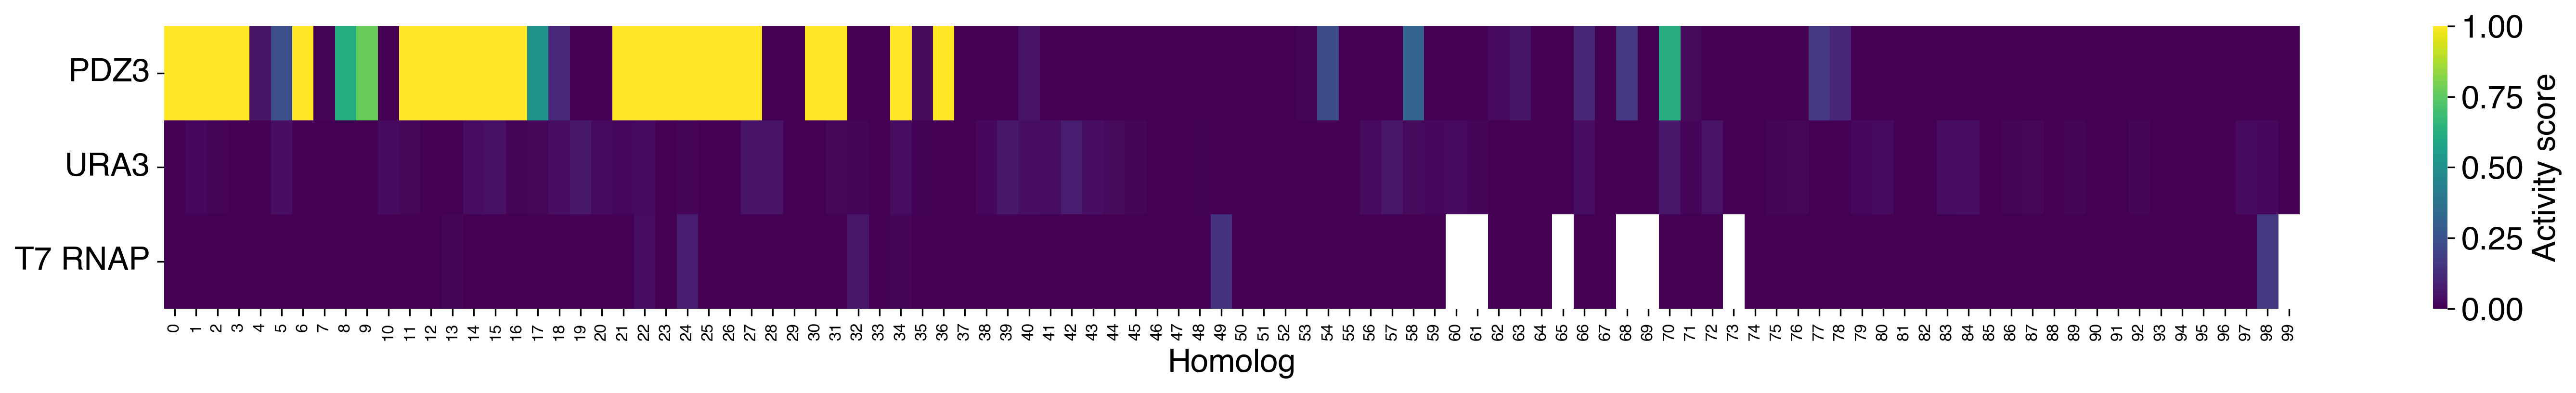

In [5]:
metrics = ['score'] #, 'seqid', 'dplddt_mean', 'tm_mean']

metric_key = {
    "score": "Activity score",
    "seqid": "Sequence identity",
    "dplddt_mean": "mean ΔpLDDT",
    "tm_mean": "mean TM-score"
}

for metric in metrics:

    pivoted_data = scores.pivot_table(
        index='Protein',
        columns='Homolog',
        values=metric,
        aggfunc='mean'
        )
    
        # Define desired index order
    order = ['PDZ3', 'URA3', 'T7 RNAP']

    # Reindex the DataFrame
    df_sorted = pivoted_data.reindex(order)

    fig, ax = plt.subplots(figsize=(20, 3))
    plt.xticks(rotation=90, fontsize=8)

    vmin = 0
    vmax = 1

    # Plotting using Seaborn heatmap
    fig = sns.heatmap(
        data=df_sorted,
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        #center=0,
        cbar_kws={'label': metric_key.get(metric)},
        annot=False,
        #center=0
        )

    # Show plot
    plt.yticks(rotation=0)
    plt.ylabel("")  # Removes the y-axis title
    plt.tight_layout()
    plt.show()